In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn import (metrics, cross_validation, linear_model, preprocessing)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
a = [['a', 'b', 'c'],['w']]

In [72]:
for i,e in enumerate(day_trade):
    if i == 0:
        for k in range(0,len(e),1):
            print e[k]

2
3
6
7
8
10
13
14
15
16
17
20
21
22
23
24
27
28
29
30


In [88]:
def read_csv(day_trade):
    data_up = []
    data_down = []
    path = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/Train_Test_Data/ML_data_2014'
    for j,i in enumerate(day_trade):
        for k in range(0,len(i),1):
            path_up = path + '_' + str(j+1) + '_' + str(i[k]) + '_' + 'UP' + '.csv'
            path_down = path + '_' + str(j+1) + '_' + str(i[k]) + '_' + 'DOWN' + '.csv'
            data_up.append(pd.read_csv(path_up))
            data_down.append(pd.read_csv(path_down))
            #print path_down
    return data_up,data_down

In [75]:
day_trade = [[2,3,6,7,8,10,13,14,15,16,17,20,21,22,23,24,27,28,29,30],\
             [7,10,11,12,13,17,18,19,21,24,25,26,27]]

In [91]:
data_2014_up, data_2014_down = read_csv(day_trade)

In [38]:
month = 1
day_trade_1 = [2,3,6,7,8,10,13,14,15,16,17,20,21,22,23,24,27,28,29,30]
data_2014_1_up, data_2014_1_down = read_csv(month,day_trade_1)

In [39]:
month = 2
day_trade_2 = [7,10,11,12,13,17,18,19,21,24,25,26,27]
data_2014_2_up, data_2014_2_down = read_csv(month,day_trade_2)

In [102]:
mean_four_day = []
for i in range(1,len(day_trade[0])+len(day_trade[1])-3,1):
    print i
    data_train = pd.concat([data_2014_up[i-1],data_2014_up[i],data_2014_up[i+1]\
                           ,data_2014_up[i+2]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 4)
    print CV_AUC
    mean_four_day.append(CV_AUC)
np.mean(mean_four_day),np.std(mean_four_day)

1
0.661796149777
2
0.65896797605
3
0.656377116655
4
0.692617632446
5
0.669556707984
6
0.703189906266
7
0.680416709499
8
0.632925147269
9
0.644213735963
10
0.652471352805
11
0.649696372383
12
0.66341352857
13
0.656645992271
14
0.647053826417
15
0.609376970299
16
0.626373859826
17
0.609911759189
18
0.618564605115
19
0.617470814273
20
0.623081198204
21
0.645653434321
22
0.671750526776
23
0.638686942935
24
0.609493293946
25
0.620455762396
26
0.626034650069
27
0.66431447279
28
0.660343642736
29
0.659576439964


(0.64725622507565184, 0.024394034941287109)

In [103]:
mean_three_day = []
for i in range(1,len(day_trade[0])+len(day_trade[1])-2,1):
    print i
    data_train = pd.concat([data_2014_up[i-1],data_2014_up[i],data_2014_up[i+1]],
                           axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 3)
    print CV_AUC
    mean_three_day.append(CV_AUC)
np.mean(mean_three_day),np.std(mean_three_day)

1
0.659518466662
2
0.661424982142
3
0.667215201821
4
0.685159318813
5
0.680634851736
6
0.704792795532
7
0.719143760494
8
0.684300850517
9
0.642323442403
10
0.651659866889
11
0.668353513135
12
0.679707509178
13
0.656806578231
14
0.667332648194
15
0.662285975904
16
0.62696746069
17
0.626314786522
18
0.61993030269
19
0.634715806918
20
0.615733583688
21
0.642997260475
22
0.71069228925
23
0.658887347901
24
0.649286809992
25
0.601635517738
26
0.627177207163
27
0.682167767694
28
0.694424394243
29
0.647513464161
30
0.664411205118


(0.65978383219646564, 0.02819964880437361)

In [105]:
mean_two_day = []
for i in range(1,len(day_trade[0])+len(day_trade[1])-1,1):
    print i
    data_train = pd.concat([data_2014_up[i-1],data_2014_up[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 3)
    print CV_AUC
    mean_two_day.append(CV_AUC)
np.mean(mean_two_day),np.std(mean_two_day)

1
0.683517942246
2
0.649930451676
3
0.680837249057
4
0.699396590947
5
0.666877703866
6
0.706550898333
7
0.723177674344
8
0.752817256103
9
0.708492928389
10
0.686999857662
11
0.669971584613
12
0.722716845074
13
0.677885441002
14
0.689941651373
15
0.668652996115
16
0.719660419611
17
0.664285331788
18
0.648851996961
19
0.633952792674
20
0.648657512141
21
0.641612964481
22
0.723105577174
23
0.718668400694
24
0.703365064608
25
0.638796318995
26
0.587225776423
27
0.684657668395
28
0.722869549913
29
0.700656713161
30
0.662512245568
31
0.667483943522


(0.6823912692550661, 0.034312285040423419)

In [43]:
mean_three_day = []
for i in range(1,len(day_trade_2)-2,1):
    print i
    data_train = pd.concat([data_2014_2_up[i-1],data_2014_2_up[i],data_2014_2_up[i+1]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 3)
    print CV_AUC
    mean_three_day.append(CV_AUC)
np.mean(mean_three_day),np.std(mean_three_day)

1
0.642997260475
2
0.71069228925
3
0.658887347901
4
0.649286809992
5
0.601635517738
6
0.627177207163
7
0.682167767694
8
0.694424394243
9
0.647513464161
10
0.664411205118


(0.65791932637343109, 0.030441894518751095)

In [44]:
mean_two_day = []
for i in range(1,len(day_trade_2)-1,1):
    print i
    data_train = pd.concat([data_2014_2_up[i-1],data_2014_2_up[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 3)
    print CV_AUC
    mean_two_day.append(CV_AUC)
np.mean(mean_two_day),np.std(mean_two_day)

1
0.641612964481
2
0.723105577174
3
0.718668400694
4
0.703365064608
5
0.638796318995
6
0.587225776423
7
0.684657668395
8
0.722869549913
9
0.700656713161
10
0.662512245568
11
0.667483943522


(0.67735947481212133, 0.0408429316536204)

In [ ]:
mean_two_day = []
for i in range(1,len(day_trade_1)+len(day_trade_2)-1,1):
    print i
    data_train = pd.concat([data_2014_2_up[i-1],data_2014_2_up[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 3)
    print CV_AUC
    mean_two_day.append(CV_AUC)
np.mean(mean_two_day),np.std(mean_two_day)

In [18]:
mean_four_day = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_up[i-1],data_2014_1_up[i],data_2014_1_up[i+1]\
                           ,data_2014_1_up[i+2]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 4)
    print CV_AUC
    mean_four_day.append(CV_AUC)
np.mean(mean_four_day),np.std(mean_four_day)

1
0.6482665898
2
0.649234993474
3
0.657458923811
4
0.695657786666
5
0.669368564252
6
0.69700164744
7
0.683451704848
8
0.636732387742
9
0.64659538748
10
0.657269752604
11
0.651986483333
12
0.659152011559
13
0.649951651681
14
0.641743600791
15
0.609619273847
16
0.619050797725


(0.65453384731589892, 0.023053038869505375)

In [20]:
mean_three_day = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_up[i-1],data_2014_1_up[i],data_2014_1_up[i+1]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 3)
    print CV_AUC
    mean_three_day.append(CV_AUC)
np.mean(mean_three_day),np.std(mean_three_day)

1
0.638519378179
2
0.646801742363
3
0.665250707983
4
0.686643502692
5
0.6894535405
6
0.697338086252
7
0.714962276135
8
0.688061732046
9
0.649769203417
10
0.65872728623
11
0.677555790136
12
0.672687172158
13
0.656915708696
14
0.658690195167
15
0.652191110562
16
0.632771010633


(0.66789615269685354, 0.022128192068738301)

In [22]:
mean_two_day = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_up[i-1],data_2014_1_up[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_AUC = cv_loop_auc(Feature_data, Label, model, 2)
    print CV_AUC
    mean_two_day.append(CV_AUC)
np.mean(mean_two_day),np.std(mean_two_day)

1
0.661421408394
2
0.627436084429
3
0.667353521554
4
0.703335048355
5
0.674535300572
6
0.705139482891
7
0.726671955058
8
0.746007567354
9
0.710333911879
10
0.68301892679
11
0.675363645467
12
0.730878772559
13
0.675839337698
14
0.688139193422
15
0.651607666172
16
0.708062203476


(0.68969650162931462, 0.030333494929333359)

In [25]:
mean_two_day_acc = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_up[i-1],data_2014_1_up[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 2)
    print CV_ACC
    mean_two_day_acc.append(CV_ACC)
np.mean(mean_two_day_acc),np.std(mean_two_day_acc)

1
0.6995
2
0.754722222222
3
0.690722222222
4
0.673
5
0.706388888889
6
0.686222222222
7
0.663444444444
8
0.690111111111
9
0.671833333333
10
0.633444444444
11
0.629166666667
12
0.670388888889
13
0.6145
14
0.6435
15
0.610944444444
16
0.645222222222


(0.66769444444444448, 0.036509749458953508)

In [26]:
mean_three_day_acc = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_up[i-1],data_2014_1_up[i],data_2014_1_up[i+1]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 3)
    print CV_ACC
    mean_three_day_acc.append(CV_ACC)
np.mean(mean_three_day_acc),np.std(mean_three_day_acc)

1
0.734185185185
2
0.69337037037
3
0.69762962963
4
0.668037037037
5
0.701814814815
6
0.658888888889
7
0.668074074074
8
0.644444444444
9
0.62637037037
10
0.617074074074
11
0.62637037037
12
0.623259259259
13
0.601185185185
14
0.61262962963
15
0.595222222222
16
0.599962962963


(0.64803240740740742, 0.040942852782018514)

In [27]:
mean_two_day_acc_down = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_down[i-1],data_2014_1_down[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 2)
    print CV_ACC
    mean_two_day_acc_down.append(CV_ACC)
np.mean(mean_two_day_acc_down),np.std(mean_two_day_acc_down)

1
0.674351851852
2
0.655138888889
3
0.70875
4
0.726342592593
5
0.67837962963
6
0.671990740741
7
0.744953703704
8
0.75662037037
9
0.739074074074
10
0.668101851852
11
0.654166666667
12
0.722916666667
13
0.706759259259
14
0.760555555556
15
0.681064814815
16
0.755833333333


(0.70656249999999998, 0.036733115367711823)

In [32]:
mean_three_day_acc_down = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_down[i-1],data_2014_1_down[i],\
                            data_2014_1_down[i+1]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 3)
    print CV_ACC
    mean_three_day_acc_down.append(CV_ACC)
np.mean(mean_three_day_acc_down),np.std(mean_three_day_acc_down)

1
0.691635802469
2
0.661913580247
3
0.676666666667
4
0.695555555556
5
0.660462962963
6
0.692561728395
7
0.722777777778
8
0.746913580247
9
0.67799382716
10
0.667901234568
11
0.658518518519
12
0.708055555556
13
0.73487654321
14
0.689660493827
15
0.72237654321
16
0.736327160494


(0.69651234567901232, 0.028142703237994723)

In [33]:
mean_four_day_acc_down = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_down[i-1],data_2014_1_down[i],\
                            data_2014_1_down[i+1],data_2014_1_down[i+2]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 4)
    print CV_ACC
    mean_four_day_acc_down.append(CV_ACC)
np.mean(mean_four_day_acc_down),np.std(mean_four_day_acc_down)

1
0.686759259259
2
0.656296296296
3
0.672384259259
4
0.676875
5
0.691018518519
6
0.693009259259
7
0.718935185185
8
0.686273148148
9
0.674884259259
10
0.662731481481
11
0.664398148148
12
0.723726851852
13
0.69099537037
14
0.729398148148
15
0.737453703704
16
0.766018518519


(0.69569733796296296, 0.029916322768312586)

In [37]:
mean_five_day_acc_down = []
for i in range(1,17,1):
    print i
    data_train = pd.concat([data_2014_1_down[i-1],data_2014_1_down[i],\
                            data_2014_1_down[i+1],data_2014_1_down[i+2],data_2014_1_down[i+3]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 5)
    print CV_ACC
    mean_five_day_acc_down.append(CV_ACC)
np.mean(mean_five_day_acc_down),np.std(mean_five_day_acc_down)

1
0.6755
2
0.652851851852
3
0.668296296296
4
0.693777777778
5
0.689111111111
6
0.689018518519
7
0.684018518519
8
0.686425925926
9
0.675055555556
10
0.68087037037
11
0.676796296296
12
0.694518518519
13
0.717611111111
14
0.739240740741
15
0.759018518519
16
0.729814814815


(0.69449537037037046, 0.027202676672366057)

In [36]:
mean_six_day_acc_down = []
for i in range(1,16,1):
    print i
    data_train = pd.concat([data_2014_1_down[i-1],data_2014_1_down[i],\
                            data_2014_1_down[i+1],data_2014_1_down[i+2],\
                            data_2014_1_down[i+3],data_2014_1_down[i+4]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    CV_ACC = cv_loop_acc(Feature_data, Label, model, 6)
    print CV_ACC
    mean_six_day_acc_down.append(CV_ACC)
np.mean(mean_six_day_acc_down),np.std(mean_six_day_acc_down)

1
0.670262345679
2
0.643904320988
3
0.687222222222
4
0.697546296296
5
0.694089506173
6
0.669151234568
7
0.681882716049
8
0.686111111111
9
0.67912037037
10
0.688441358025
11
0.665077160494
12
0.716311728395
13
0.725848765432
14
0.75737654321
15
0.728981481481


(0.69275514403292182, 0.028019201699110586)

In [6]:
SEED = 42
def cv_loop_auc(X, y, model, N):
    mean_auc = 0.0
    for i in range(0,N,1):
        X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
                                       X, y, test_size=1.0/float(N), 
                                       random_state = i*SEED)
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_cv)[:,1]
        auc = metrics.roc_auc_score(y_cv, preds)
        #print auc
        mean_auc += auc
    return mean_auc/N

In [17]:
model = linear_model.LogisticRegression()
cv_loop_auc(Feature_data, Label, model, 10)

0.61697457333410655

In [8]:
SEED = 42
def cv_loop_acc(X, y, model, N):
    mean_acc = 0.0
    for i in range(0,N,1):
        X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
                                       X, y, test_size=1.0/float(N), 
                                       random_state = i*SEED)
        model.fit(X_train, y_train)
        preds = model.predict(X_cv)
        acc = metrics.accuracy_score(y_cv, preds)
        #print acc
        mean_acc += acc
    return mean_acc/N

In [85]:
model = linear_model.LogisticRegression()
cv_loop_acc(Feature_data, Label, model, 10)

0.611868686869
0.596464646465
0.610606060606
0.619949494949
0.610101010101
0.614646464646
0.620202020202
0.597222222222
0.602525252525
0.612626262626


0.60962121212121212

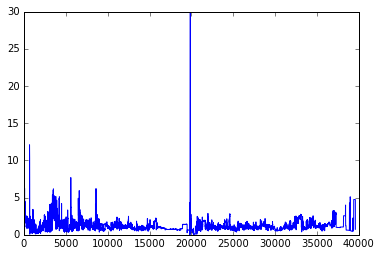

In [35]:
plot(Feature_data['9'])

In [32]:
for i in range(17,20,1):
    data_train = pd.concat([data_2014_1[i-1],data_2014_1[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    print i
    print cv_loop_acc(Feature_data, Label, model, 10)

17


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [92]:
from sklearn.grid_search import (GridSearchCV, RandomizedSearchCV)
from sklearn.ensemble import RandomForestClassifier

Feature_data = data_train.drop(["0"],axis=1)
Label = data_train['0']

num_trees = [10]
max_depth = [None]
criterion = ['entropy']
min_samples_leaf = [1,3,5,7]
min_samples_split = [3,5]
max_features = [None]

model_grid = {'max_features':max_features,'n_estimators':num_trees,'max_depth':max_depth,\
              'min_samples_split':min_samples_split,'criterion':criterion,\
              'min_samples_leaf':min_samples_leaf}

model1 = RandomForestClassifier(random_state = 0)
Grid = GridSearchCV(model1, model_grid, cv = 5, scoring = 'roc_auc')

%time Grid.fit(Feature_data, Label) 
Grid.grid_scores_

CPU times: user 5min 38s, sys: 595 ms, total: 5min 38s
Wall time: 6min 21s


[mean: 0.52566, std: 0.08123, params: {'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52435, std: 0.08493, params: {'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52158, std: 0.08665, params: {'min_samples_leaf': 3, 'n_estimators': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52158, std: 0.08665, params: {'min_samples_leaf': 3, 'n_estimators': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52830, std: 0.08738, params: {'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52830, std: 0.08738, params: {'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_featu

In [93]:
Grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 10}